使用relu激活函式來訓練(-1~1)範圍內進行"乘上-1"的神經網路

# Include

In [33]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt

# Model

In [35]:
input_1 = keras.Input(shape=(1, ))
output_1 = layers.Dense(1, activation='relu')(input_1)
model = keras.Model(inputs=[input_1], outputs=[output_1])
model.summary()
model.compile(optimizer="adam", loss="mse")
# model.compile(optimizer=optimizers.Adam(0.001), loss=losses.MeanSquaredError())
print(model.get_weights())
# plot_model(model, show_shapes=True)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[-0.20134437]], dtype=float32), array([0.], dtype=float32)]


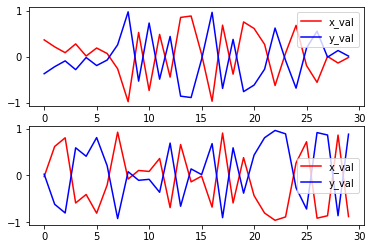

In [36]:
num = 1000
x_train = np.random.rand(num) * 2 - 1
y_train = x_train * -1
x_val = np.random.rand(num) * 2 - 1
y_val = x_val * -1
plt.subplot(211)
plt.plot(x_train[:30], color='r', label='x_val')
plt.plot(y_train[:30], color='b', label='y_val')
plt.legend()
plt.subplot(212)
plt.plot(x_val[:30], color='r', label='x_val')
plt.plot(y_val[:30], color='b', label='y_val')
plt.legend()
plt.show()

In [37]:
model_dir = 'models'
callbacks = list()
''' EarlyStopping '''
callbacks.append(
    keras.callbacks.EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
)
''' ModelCheckpoint '''
# model_name = 'epoch_{epoch:03d}-val_loss_{val_loss:.3f}.hdf5'
# filepath = os.path.join(model_dir, model_name)
# callbacks.append(
#     keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
# )
''' TensorBoard '''
# log_dir = os.path.join(model_dir, 'log')
# callbacks.append(
#     keras.callbacks.TensorBoard(log_dir=log_dir)
# )
''' trainParam '''
batch_size = 640
epochs = 10000

# Train

In [38]:
trainHistory = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/10000
2/2 [==============================] - 0s 62ms/step - loss: 0.2681 - val_loss: 0.2665
Epoch 2/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2669 - val_loss: 0.2652
Epoch 3/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.2656 - val_loss: 0.2639
Epoch 4/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2643 - val_loss: 0.2626
Epoch 5/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2631 - val_loss: 0.2613
Epoch 6/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2618 - val_loss: 0.2601
Epoch 7/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2606 - val_loss: 0.2588
Epoch 8/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2593 - val_loss: 0.2576
Epoch 9/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.2581 - val_loss: 0.2563
Epoch 10/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2569 - val_loss: 0.2551

[array([[-0.99833286]], dtype=float32), array([0.00088209], dtype=float32)]


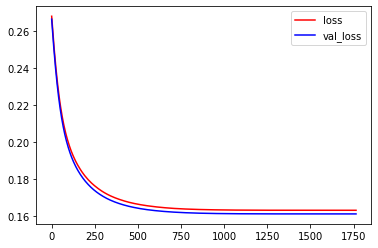

In [39]:
print(model.get_weights())
plt.plot(trainHistory.history['loss'], color='r', label='loss')
plt.plot(trainHistory.history['val_loss'], color='b', label='val_loss')
plt.legend()
plt.show()

# Test

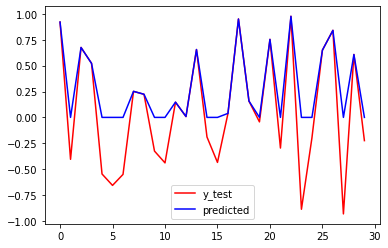

-0.921,  0.920, ads_diff = -0.001
 0.405,  0.000, ads_diff =  0.405
-0.675,  0.675, ads_diff = -0.000
-0.522,  0.522, ads_diff =  0.000
 0.546,  0.000, ads_diff =  0.546
 0.657,  0.000, ads_diff =  0.657
 0.550,  0.000, ads_diff =  0.550
-0.251,  0.252, ads_diff =  0.000
-0.223,  0.223, ads_diff =  0.001
 0.325,  0.000, ads_diff =  0.325
 0.439,  0.000, ads_diff =  0.439
-0.147,  0.147, ads_diff =  0.001
-0.008,  0.009, ads_diff =  0.001
-0.655,  0.655, ads_diff = -0.000
 0.189,  0.000, ads_diff =  0.189
 0.435,  0.000, ads_diff =  0.435
-0.038,  0.039, ads_diff =  0.001
-0.950,  0.950, ads_diff = -0.001
-0.157,  0.158, ads_diff =  0.001
 0.043,  0.000, ads_diff =  0.043
-0.754,  0.753, ads_diff = -0.000
 0.296,  0.000, ads_diff =  0.296
-0.977,  0.976, ads_diff = -0.001
 0.887,  0.000, ads_diff =  0.887
 0.198,  0.000, ads_diff =  0.198
-0.650,  0.649, ads_diff = -0.000
-0.841,  0.840, ads_diff = -0.001
 0.932,  0.000, ads_diff =  0.932
-0.607,  0.607, ads_diff = -0.000
 0.224,  0.000

In [40]:
num = 1000
x_test = np.random.rand(num) * 2 - 1
y_test = x_test * -1
predicted = model.predict(x_test)
plt.plot(y_test[:30], color='r', label='y_test')
plt.plot(predicted[:30], color='b', label='predicted')
plt.legend()
plt.show()
for i in range(100):
    print(f'{x_test[i]:6.3f}, {predicted[i, 0]:6.3f}, ads_diff = {predicted[i, 0] + x_test[i]:6.3f}')